In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
#import imblearn

from scipy import stats

red_wine = pd.read_csv('winequality-red.csv', sep = ';')
white_wine = pd.read_csv('winequality-white.csv', sep = ';')

# create a new variable 'wine_type'
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'


# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])

In [30]:
wine_sales = pd.read_csv('wine_sales_data.csv')

In [31]:
wine_sales.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [32]:
winw_sales_red = wine_sales[['country','province','points','price']]

In [33]:
winw_sales_red.isnull().sum()

country         5
province        5
points          0
price       13695
dtype: int64

In [34]:
winw_sales_red.head

<bound method NDFrame.head of        country            province  points  price
0           US          California      96  235.0
1        Spain      Northern Spain      96  110.0
2           US          California      96   90.0
3           US              Oregon      96   65.0
4       France            Provence      95   66.0
...        ...                 ...     ...    ...
150925   Italy      Southern Italy      91   20.0
150926  France           Champagne      91   27.0
150927   Italy      Southern Italy      91   20.0
150928  France           Champagne      90   52.0
150929   Italy  Northeastern Italy      90   15.0

[150930 rows x 4 columns]>

In [35]:
port_vv = winw_sales_red[(winw_sales_red['country'] == 'Portugal') & (winw_sales_red['province'] == 'Vinho Verde')]

In [36]:
port_vv.shape

(396, 4)

In [37]:
port_vv.isnull().sum()

country      0
province     0
points       0
price       86
dtype: int64

In [38]:
port_vv_clean = port_vv.dropna()

In [39]:
port_vv_clean.drop(['country', 'province'], axis = 1, inplace = True)

In [40]:
port_vv_clean.describe()

,points,price
count,310.000000,310.000000
mean,86.351613,11.400000
std,2.512541,4.821205
min,80.000000,5.000000
25%,84.000000,8.000000
50%,86.000000,10.000000
75%,88.000000,13.000000
max,92.000000,45.000000


In [41]:
price_iqr = port_vv_clean[port_vv_clean['price'].between(port_vv_clean['price'].quantile(0.25), port_vv_clean['price'].quantile(0.75))]

In [42]:
price_iqr.describe()

,points,price
count,198.000000,198.000000
mean,85.979798,10.287879
std,2.279816,1.719684
min,80.000000,8.000000
25%,84.000000,9.000000
50%,85.500000,10.000000
75%,88.000000,12.000000
max,91.000000,13.000000


In [43]:
binned_rating = pd.cut(price_iqr['points'], 3)

In [44]:
binned_rating

993       (83.667, 87.333]
994       (83.667, 87.333]
1558      (83.667, 87.333]
1559      (83.667, 87.333]
1694        (87.333, 91.0]
                ...       
140222    (83.667, 87.333]
140230    (83.667, 87.333]
141129    (79.989, 83.667]
141143    (79.989, 83.667]
143472    (83.667, 87.333]
Name: points, Length: 198, dtype: category
Categories (3, interval[float64]): [(79.989, 83.667] < (83.667, 87.333] < (87.333, 91.0]]

In [45]:
F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'],
wines[wines['quality_label'] == 'medium']['pH'],
wines[wines['quality_label'] == 'high']['pH'])
print('ANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistic: 1.2363860803545195 	p-value: 0.2905002779768688


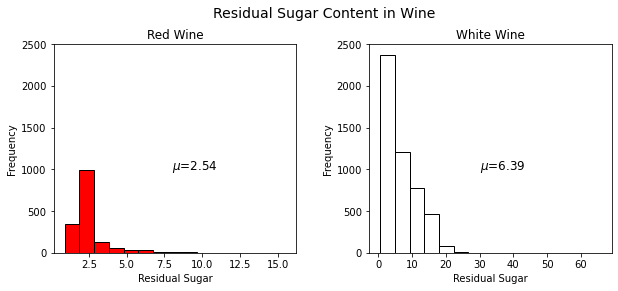

In [46]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15, edgecolor='black', linewidth=1)
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='white', bins=15, edgecolor='black', linewidth=1)

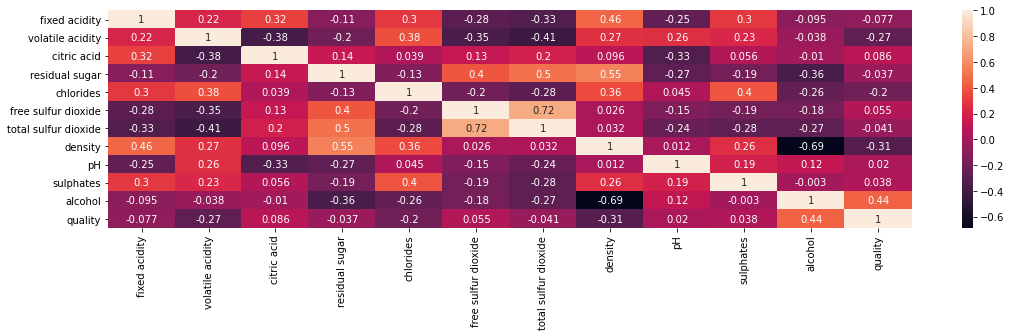

In [47]:
correlation_mat = wines.corr()
plt.figure(figsize=(18,4))
sns.heatmap(correlation_mat, annot = True)
plt.savefig("correlation.png")
plt.show()

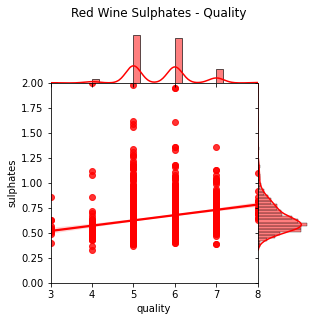

In [48]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
kind='reg', ylim=(0, 2),
color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12);

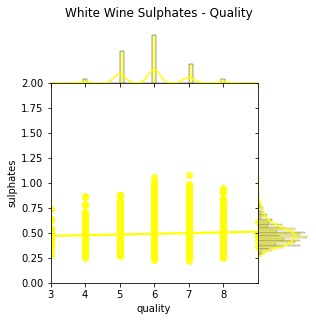

In [49]:
wj = sns.jointplot(x='quality', y='sulphates', data=white_wine,
kind='reg', ylim=(0, 2),
color='yellow', space=0, size=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,9)))
fig = wj.fig
fig.subplots_adjust(top=0.9)
t2 = fig.suptitle('White Wine Sulphates - Quality', fontsize=12);

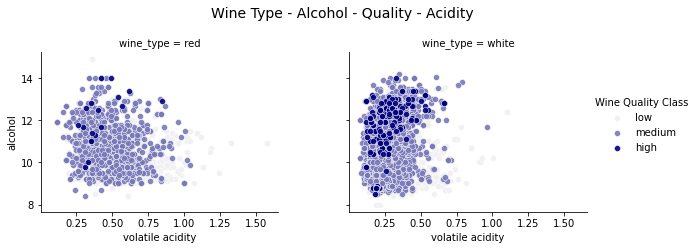

In [50]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9,
edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

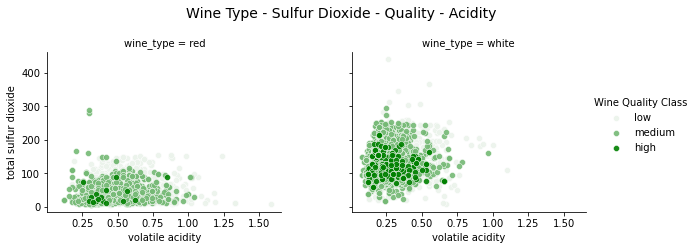

In [51]:
ww = sns.FacetGrid(wines, col="wine_type", hue='quality_label', col_order=['red', 'white'], hue_order=['low', 'medium', 'high'], aspect=1.2, size=3.5, palette=sns.light_palette('green', 3))
ww.map(plt.scatter, "volatile acidity", "total sulfur dioxide", alpha=0.9, edgecolor='white', linewidth=0.5)
fig = ww.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Quality - Acidity', fontsize=14)
l = ww.add_legend(title='Wine Quality Class')

<AxesSubplot:xlabel='alcohol'>

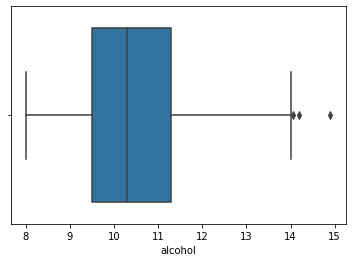

In [52]:
sns.boxplot(x=wines["alcohol"])

In [53]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [56]:
wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features, wtp_class_labels, test_size=0.3, random_state=42)

print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({'white': 3450, 'red': 1097}) Counter({'white': 1448, 'red': 502})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [57]:
# Define the scaler
wtp_ss = StandardScaler().fit(wtp_train_X)
# Scale the train set
wtp_train_SX = wtp_ss.transform(wtp_train_X)
# Scale the test set
wtp_test_SX = wtp_ss.transform(wtp_test_X)

In [58]:
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)
# Hyperparameters
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [59]:
wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['red', 'white']))

              precision    recall  f1-score   support

         red       0.98      0.98      0.98       502
       white       0.99      0.99      0.99      1448

    accuracy                           0.99      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.99      0.99      0.99      1950



In [60]:
cohen_kappa_score(wtp_test_y, wtp_lr_predictions)

0.969129556745863

In [61]:
confusion_matrix(wtp_test_y, wtp_lr_predictions)

array([[ 490,   12],
       [  11, 1437]], dtype=int64)

In [62]:
plot_confusion_matrix(wtp_lr, wtp_test_y, wtp_lr_predictions)

ValueError: could not convert string to float: 'white'

In [63]:
wtp_lr.coef_

array([[-0.64272098, -1.48636388,  0.36899419,  3.41040915, -0.84794669,
        -0.9438766 ,  2.89591032, -3.1215053 , -0.36480762, -0.77693953,
        -1.02540439]])

In [64]:
wtp_lr.intercept_

array([4.41682443])

In [65]:
np.array(wines['wine_type'])

array(['red', 'red', 'red', ..., 'white', 'white', 'white'], dtype=object)

In [66]:
wtp_gb = GaussianNB()
wtp_gb.fit(wtp_train_SX, wtp_train_y)
wtp_gb_predictions = wtp_gb.predict(wtp_test_SX)
print(classification_report(wtp_test_y,wtp_gb_predictions, target_names=['red', 'white'], digits=3))

              precision    recall  f1-score   support

         red      0.924     0.968     0.946       502
       white      0.989     0.972     0.981      1448

    accuracy                          0.971      1950
   macro avg      0.956     0.970     0.963      1950
weighted avg      0.972     0.971     0.971      1950



In [67]:
cohen_kappa_score(wtp_test_y, wtp_gb_predictions)

0.9260411135553364

In [68]:
accuracy_score(wtp_test_y, wtp_gb_predictions)

0.9712820512820513

In [69]:
confusion_matrix(wtp_test_y, wtp_gb_predictions)

array([[ 486,   16],
       [  40, 1408]], dtype=int64)

In [70]:
wtp_svm = svm.SVC()
wtp_svm.fit(wtp_train_SX, wtp_train_y)
wtp_svm_predictions = wtp_svm.predict(wtp_test_SX)
print(classification_report(wtp_test_y,wtp_svm_predictions, target_names=['red', 'white']))

              precision    recall  f1-score   support

         red       1.00      0.98      0.99       502
       white       0.99      1.00      1.00      1448

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [71]:
cohen_kappa_score(wtp_test_y, wtp_svm_predictions)

0.9838199338415072

In [72]:
cross_val_score(wtp_gb, wtp_features, wtp_class_labels, cv=10)

array([0.96923077, 0.96923077, 0.96      , 0.96      , 0.98      ,
       0.98153846, 0.97076923, 0.96918336, 0.97842835, 0.96456086])

In [73]:
cross_val_score(wtp_lr, wtp_features, wtp_class_labels, cv=10)

array([0.97076923, 0.97692308, 0.98      , 0.98153846, 0.99076923,
       0.99230769, 0.98769231, 0.96302003, 0.98459168, 0.98305085])

In [117]:
cross_val_score(wtp_svm, wtp_features, wtp_class_labels, cv=10)

array([0.90307692, 0.91230769, 0.95384615, 0.93692308, 0.94153846,
       0.94307692, 0.96      , 0.93528505, 0.93220339, 0.94915254])

In [27]:
confusion_matrix(wtp_test_y, wtp_svm_predictions)

NameError: name 'wtp_test_y' is not defined